In [25]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

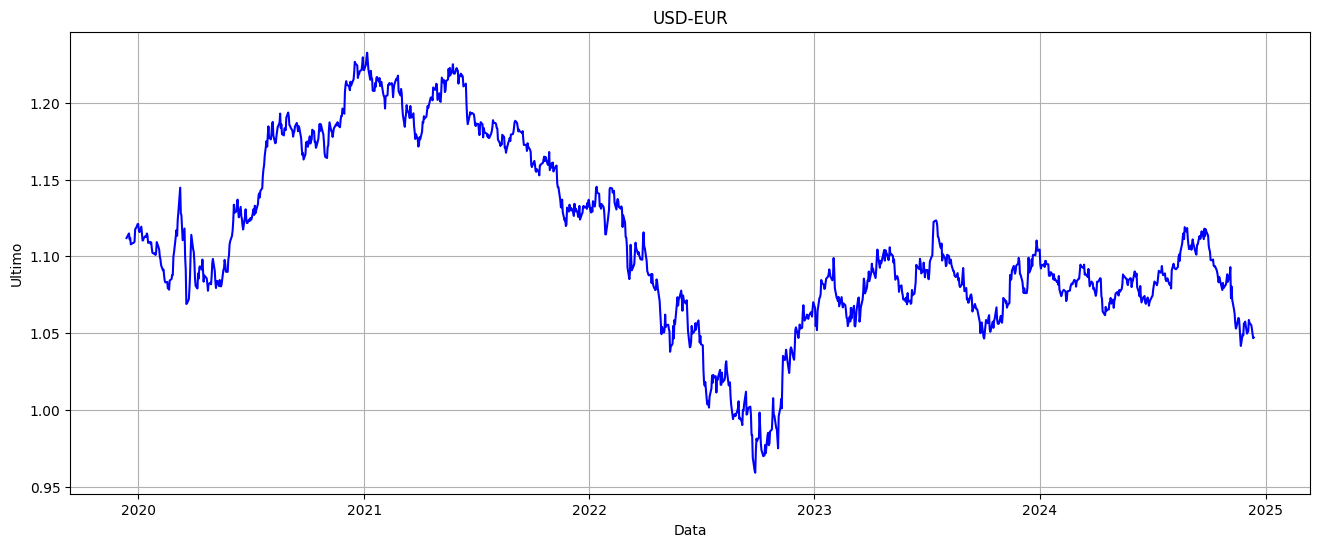

In [ ]:

eur_usd = pd.DataFrame(pd.read_csv("C:\\Users\\2003l\\Downloads\\EUR_USD Dati Storici.csv"))
eur_usd["Data"] = pd.to_datetime(eur_usd["Data"], format="%d.%m.%Y")
eur_usd = eur_usd.sort_values(by="Data", ascending=True).reset_index(drop=True)
eur_usd["Ultimo"] = eur_usd["Ultimo"].str.replace(",", ".").astype(float)
data1 = eur_usd[['Data', 'Ultimo']].copy()
data1.set_index('Data', inplace=True)

plt.figure(figsize=(16, 6))
plt.plot(eur_usd['Data'], eur_usd['Ultimo'], marker='', linestyle='-', color='b')
plt.xlabel('Data')
plt.ylabel('Ultimo')
plt.title('USD-EUR')
plt.grid()
plt.show()

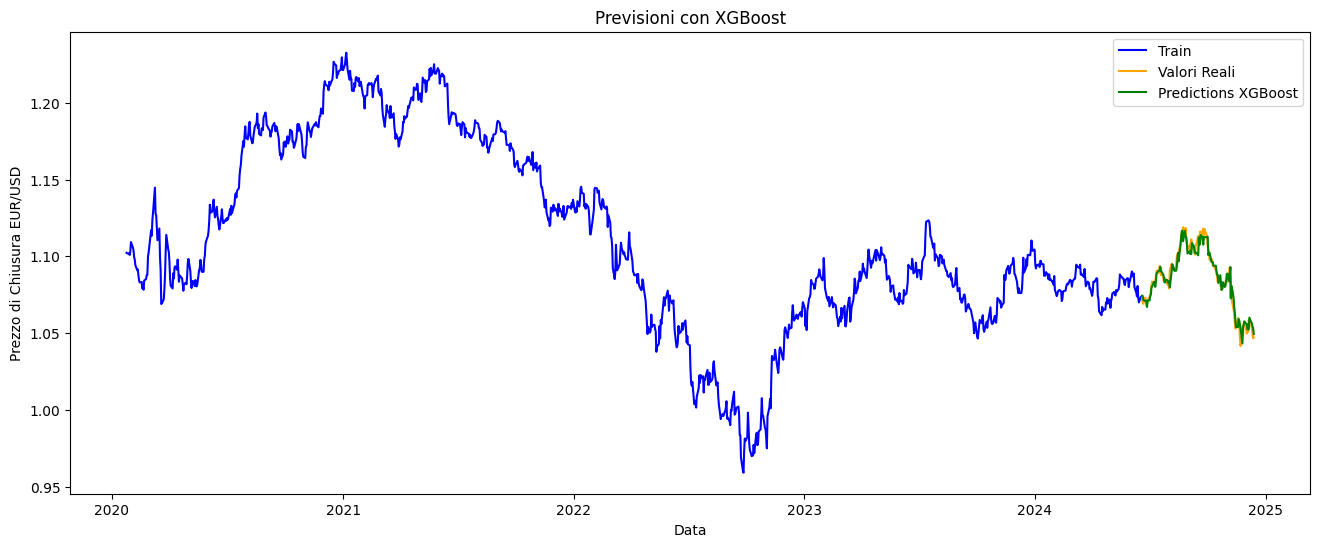

In [27]:
# Feature lag 
data_xgb = data1.copy()
data_xgb['Lag_1'] = data_xgb['Ultimo'].shift(1)
data_xgb['Lag_7'] = data_xgb['Ultimo'].shift(7)
data_xgb['Lag_30'] = data_xgb['Ultimo'].shift(30)

# Rimozione dei NaN creati dai lag
data_xgb = data_xgb.dropna()

# Suddivisione in train e test
train_xgb, test_xgb = train_test_split(data_xgb, test_size=0.1, shuffle=False)

# Definizione delle feature e target
x_train_xgb = train_xgb.drop(columns=['Ultimo'])
y_train_xgb = train_xgb['Ultimo']
x_test_xgb = test_xgb.drop(columns=['Ultimo'])
y_test_xgb1 = test_xgb['Ultimo']

# Creazione del modello XGBoost
model_xgb = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.05)
model_xgb.fit(x_train_xgb, y_train_xgb)

# Previsioni
pred_xgb1 = model_xgb.predict(x_test_xgb)

# Aggiungere le previsioni al dataframe
test_xgb['Predictions'] = pred_xgb1

# Grafico del confronto
plt.figure(figsize=(16,6))
plt.plot(train_xgb.index, train_xgb['Ultimo'], label='Train', color='blue')
plt.plot(test_xgb.index, test_xgb['Ultimo'], label='Valori Reali', color='orange')
plt.plot(test_xgb.index, test_xgb['Predictions'], label='Predictions XGBoost', color='green')

plt.xlabel('Data')
plt.ylabel('Prezzo di Chiusura EUR/USD')
plt.title('Previsioni con XGBoost')
plt.legend()
plt.show()

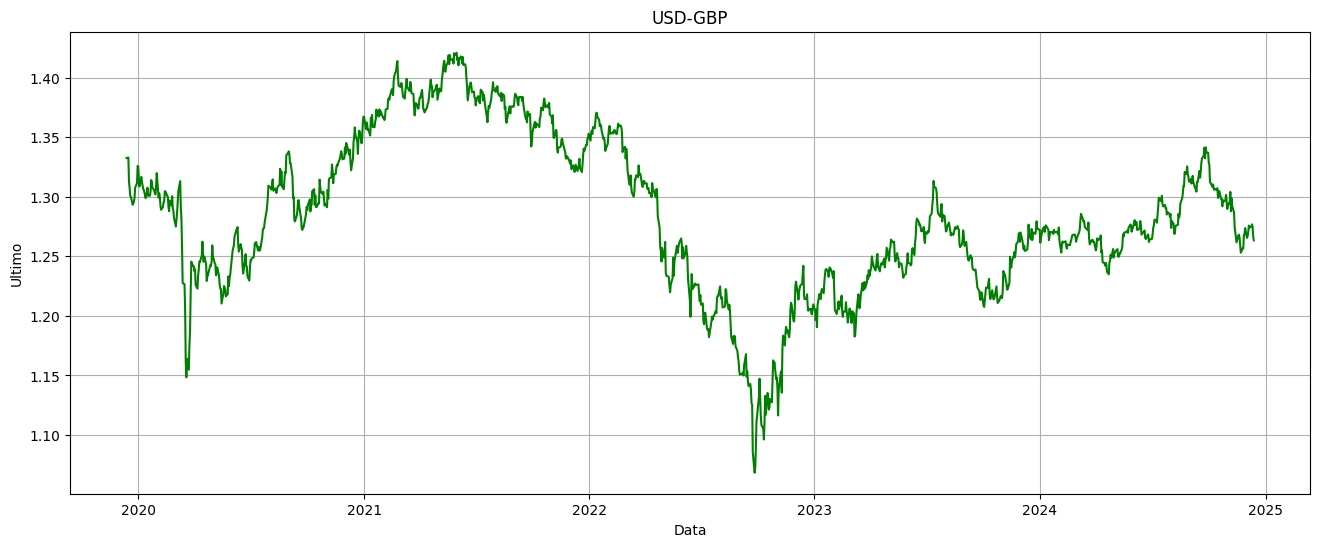

In [28]:
gbp_usd = pd.DataFrame(pd.read_csv("C:\\Users\\2003l\\Downloads\\GBP_USD Dati Storici.csv"))

gbp_usd["Data"] = pd.to_datetime(gbp_usd["Data"], format="%d.%m.%Y")
gbp_usd = gbp_usd.sort_values(by="Data", ascending=True).reset_index(drop=True)
gbp_usd["Ultimo"] = gbp_usd["Ultimo"].str.replace(",", ".").astype(float)
data2 = gbp_usd[['Data', 'Ultimo']].copy()
data2.set_index('Data', inplace=True)

plt.figure(figsize=(16, 6))
plt.plot(gbp_usd['Data'], gbp_usd['Ultimo'], marker='', linestyle='-', color='g')
plt.xlabel('Data')
plt.ylabel('Ultimo')
plt.title('USD-GBP')
plt.grid()
plt.show()

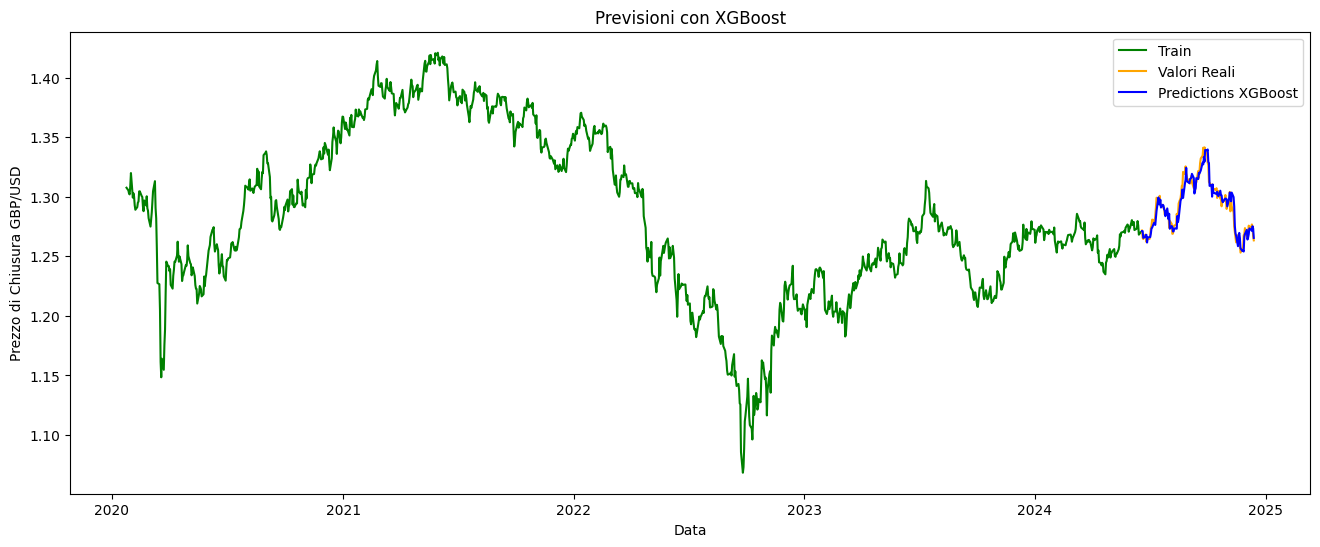

In [ ]:
# Creare feature lag 
data_xgb = data2.copy()
data_xgb['Lag_1'] = data_xgb['Ultimo'].shift(1)
data_xgb['Lag_7'] = data_xgb['Ultimo'].shift(7)
data_xgb['Lag_30'] = data_xgb['Ultimo'].shift(30)

# Rimozione dei NaN creati dai lag
data_xgb = data_xgb.dropna()

# Suddivisione in train e test
train_xgb, test_xgb = train_test_split(data_xgb, test_size=0.1, shuffle=False)

# Definizione delle feature e target
x_train_xgb = train_xgb.drop(columns=['Ultimo'])
y_train_xgb = train_xgb['Ultimo']
x_test_xgb = test_xgb.drop(columns=['Ultimo'])
y_test_xgb2 = test_xgb['Ultimo']

# Creazione del modello XGBoost
model_xgb = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.05)
model_xgb.fit(x_train_xgb, y_train_xgb)

# Previsioni
pred_xgb2 = model_xgb.predict(x_test_xgb)

# Aggiungere le previsioni al dataframe
test_xgb['Predictions'] = pred_xgb2

# Grafico del confronto
plt.figure(figsize=(16,6))
plt.plot(train_xgb.index, train_xgb['Ultimo'], label='Train', color='green')
plt.plot(test_xgb.index, test_xgb['Ultimo'], label='Valori Reali', color='orange')
plt.plot(test_xgb.index, test_xgb['Predictions'], label='Predictions XGBoost', color='blue')
plt.xlabel('Data')
plt.ylabel('Prezzo di Chiusura GBP/USD')
plt.title('Previsioni con XGBoost')
plt.legend()
plt.show()

In [30]:
# Calcolare metriche di valutazione per XGBoost

mae_xgb1 = mean_absolute_error(y_test_xgb1, pred_xgb1)
mse_xgb1 = mean_squared_error(y_test_xgb1, pred_xgb1)
r2_xgb1 = r2_score(y_test_xgb1, pred_xgb1)
rmse_xgb1 = np.sqrt(mse_xgb1)

mae_xgb2 = mean_absolute_error(y_test_xgb2, pred_xgb2)
mse_xgb2 = mean_squared_error(y_test_xgb2, pred_xgb2)
r2_xgb2 = r2_score(y_test_xgb2, pred_xgb2)
rmse_xgb2 = np.sqrt(mse_xgb2)
print("GBP_USD")
print(f'RMSE: {rmse_xgb2}')
print(f"MAE: {mae_xgb2}")
print(f"MSE: {mse_xgb2}")
print(f"R^2: {r2_xgb2}")

print("EUR_USD")
print(f'RMSE: {rmse_xgb1}')
print(f"MAE: {mae_xgb1}")
print(f"MSE: {mse_xgb1}")
print(f"R^2: {r2_xgb1}")

GBP_USD
RMSE: 0.006340694904695475
MAE: 0.004855062934756278
MSE: 4.020441187443116e-05
R^2: 0.9127266017796535
EUR_USD
RMSE: 0.00461224559346158
MAE: 0.0034774828448891713
MSE: 2.1272809414405762e-05
R^2: 0.9489168568989249
